In [19]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score



In [20]:

# Step 2: Load the dataset
file_path = 'C:\MSXL\mlfinalproject\merged_deliveries_matches_NEW.csv'
data = pd.read_csv('C:\MSXL\mlfinalproject\merged_deliveries_matches_NEW.csv', low_memory=False)


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\suman\AppData\Local\Temp\ipykernel_35616\3534196036.py:2: SyntaxWarning: invalid escape sequence '\M'
  file_path = 'C:\MSXL\mlfinalproject\merged_deliveries_matches_NEW.csv'
C:\Users\suman\AppData\Local\Temp\ipykernel_35616\3534196036.py:3: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv('C:\MSXL\mlfinalproject\merged_deliveries_matches_NEW.csv', low_memory=False)


In [21]:
def analyze_player_performance(player_name):
    # Filter data for the specific player as a batter
    player_batter_data = data[data['batter'] == player_name]
    
    # Check if there is enough data for the player as a batter
    if player_batter_data.empty:
        print(f"No data available for player: {player_name}")
        return

    # Calculate runs scored by the player against different teams
    runs_against_teams = player_batter_data.groupby('bowling_team')['batsman_runs'].sum()
    
    # Calculate runs scored by the player in different years
    player_batter_data['year'] = pd.to_datetime(player_batter_data['date']).dt.year
    runs_by_year = player_batter_data.groupby('year')['batsman_runs'].sum()
    
    # Plot bar graphs for runs against different teams and in different years
    fig, ax = plt.subplots(2, 1, figsize=(10, 12))
    
    # Bar graph for runs against different teams
    ax[0].bar(runs_against_teams.index, runs_against_teams, color='skyblue')
    ax[0].set_title(f'Runs scored by {player_name} against different teams')
    ax[0].set_ylabel('Runs')
    ax[0].set_xticklabels(runs_against_teams.index, rotation=45, ha='right')

    # Bar graph for runs in different years
    ax[1].bar(runs_by_year.index, runs_by_year, color='lightgreen')
    ax[1].set_title(f'Runs scored by {player_name} in different years')
    ax[1].set_ylabel('Runs')
    ax[1].set_xticks(runs_by_year.index)
    ax[1].set_xticklabels(runs_by_year.index, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

    # Summary statistics for batter
    total_runs = player_batter_data['batsman_runs'].sum()
    matches_played = player_batter_data['match_id'].nunique()
    
    # Unique matches where the player was awarded "Player of the Match"
    player_of_match_awards = player_batter_data[player_batter_data['player_of_match'] == player_name]
    unique_matches_with_award = player_of_match_awards.groupby('match_id').size().count()
    
    print(f"\nSummary for {player_name}:")
    print(f"Total Runs: {total_runs}")
    print(f"Matches Played: {matches_played}")
    print(f"Player of the Match Awards: {unique_matches_with_award}")

    # Check if the player is also a bowler
    player_bowler_data = data[data['bowler'] == player_name]
    
    if not player_bowler_data.empty:
        print(f"{player_name} has bowling data.")
    else:
        print("Player has no bowling data.")


C:\Users\suman\AppData\Local\Temp\ipykernel_35616\3498329531.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_batter_data['year'] = pd.to_datetime(player_batter_data['date']).dt.year
C:\Users\suman\AppData\Local\Temp\ipykernel_35616\3498329531.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(runs_against_teams.index, rotation=45, ha='right')


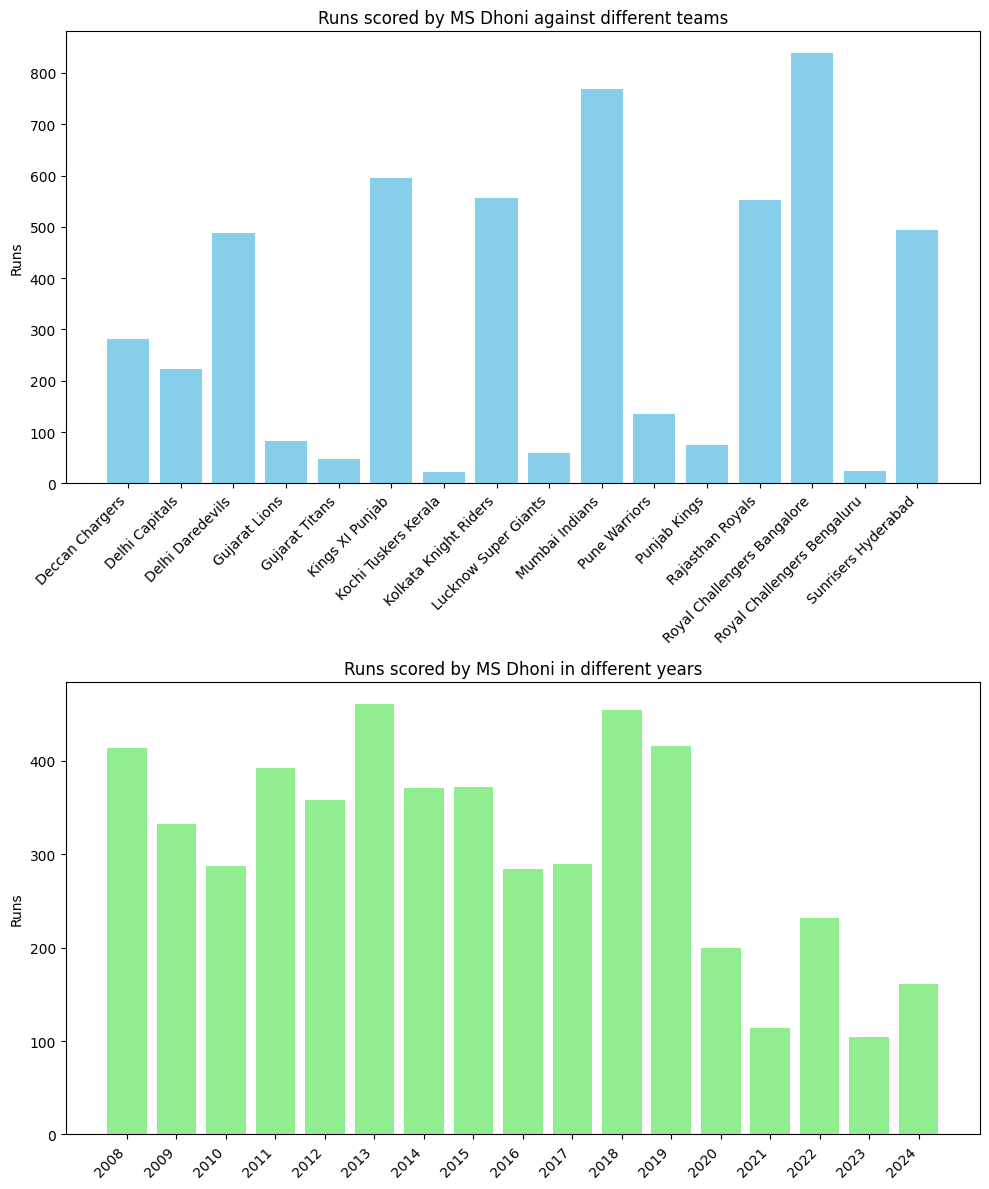


Summary for MS Dhoni:
Total Runs: 5243
Matches Played: 228
Player of the Match Awards: 17
Player has no bowling data.


In [22]:
# Step 4: Example usage - analyze a specific player
analyze_player_performance("MS Dhoni")